# P5 Part B

## Team Jarlsberg

###### Zachary Noel

###### Siddhesh Mahadeshwar

###### Erin Dolson

In [25]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from itertools import chain
import sklearn.naive_bayes as nb
from os import listdir
from os.path import isfile, join
%matplotlib inline

Perform principal component analysis on the college data (make sure to prepare the data in any way necessary).

In [26]:
college_data = pd.read_csv("college_data.csv")
cnames = college_data.columns[3:21]

pca = PCA()
pca.fit(college_data.iloc[:,3:21])
pc = pd.DataFrame(pca.components_)
pc.columns = cnames
pc.index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18']
pc


,Early Career Pay,Mid-Career Pay,Total price for in-district students living on campus 2015-16 (DRVIC2015),Professors (S2014_SIS_RV With faculty status tenured),Associate professors (S2014_SIS_RV With faculty status tenured),Assistant professors (S2014_SIS_RV With faculty status on tenure track),Average salary equated to 9 months of full-time instructional staff - professors (DRVHR2014_RV),Average salary equated to 9 months of full-time instructional staff - associate professors (DRVHR2014_RV),Average salary equated to 9 months of full-time instructional staff - assistant professors (DRVHR2014_RV),Percent admitted - men (DRVADM2014_RV),Percent admitted - women (DRVADM2014_RV),Percent admitted - total (DRVADM2014_RV),Full-time retention rate 2014 (EF2014D_RV),Student-to-faculty ratio (EF2014D_RV),Percent of total enrollment that are women (DRVEF2014_RV),Total enrollment (DRVEF2014_RV),Graduation rate total cohort (DRVGR2014_RV),Percent of full-time first-time undergraduates awarded Pell grants (SFA1314_RV)
PC1,0.178841,0.093246,0.302823,0.004051,0.000617,0.001153,0.773202,0.397741,0.332968,-0.000339,-0.000363,-0.000356,0.000094,-0.000093,-0.000051,0.026340,0.000281,-0.000172
PC2,-0.250502,0.053244,-0.401034,0.015972,0.008499,0.004063,0.250735,-0.083752,-0.064210,0.000107,-0.000007,0.000068,-0.000011,0.000082,0.000384,0.836204,0.000089,0.000120
PC3,0.370337,0.707632,-0.556394,-0.002055,-0.002495,-0.002329,0.027751,0.089738,-0.046539,-0.000203,-0.000136,-0.000150,0.000065,0.000211,-0.000033,-0.203786,0.000047,0.000027
PC4,0.811254,-0.166551,0.139313,0.005586,0.000937,0.000220,-0.294055,-0.037051,0.178130,-0.000671,-0.000591,-0.000634,0.000137,0.000167,0.000081,0.418468,0.000051,0.000076
PC5,0.089659,-0.634980,-0.621199,0.000740,-0.001581,-0.000147,0.056635,0.379246,0.125900,0.000330,0.000336,0.000358,-0.000013,-0.000058,-0.000275,-0.199957,0.000164,-0.000226
PC6,0.285175,-0.233648,-0.097155,0.003871,-0.004003,-0.007199,0.497051,-0.685059,-0.320383,-0.000938,-0.000938,-0.000993,0.000037,-0.000129,0.000165,-0.188541,0.000547,0.000504
PC7,0.143447,-0.046746,0.152161,0.018816,0.000848,0.007150,0.041406,0.460563,-0.855760,-0.003243,-0.003230,-0.003300,0.000209,-0.000500,0.000936,0.086523,0.000338,0.001042
PC8,-0.001832,0.002773,0.000388,0.865200,0.344201,0.357999,-0.006685,-0.008935,0.015099,-0.027723,-0.030327,-0.027406,0.003920,-0.007544,-0.014730,-0.020020,0.022691,-0.027999
PC9,-0.005432,0.001903,0.000612,0.426558,-0.876154,-0.186344,-0.003660,0.000365,0.006789,-0.024986,-0.045170,-0.032481,-0.003855,0.018643,0.038903,0.001837,-0.014665,0.098850
PC10,0.002189,-0.000779,-0.002236,-0.254163,-0.312138,0.903853,0.003444,-0.005302,-0.000301,-0.031563,-0.080337,-0.045535,-0.055237,-0.017073,0.036291,0.001687,-0.066609,-0.048452


(b) Plot the data in the space defined by the first two principal components (labeling each point with the school it represents)

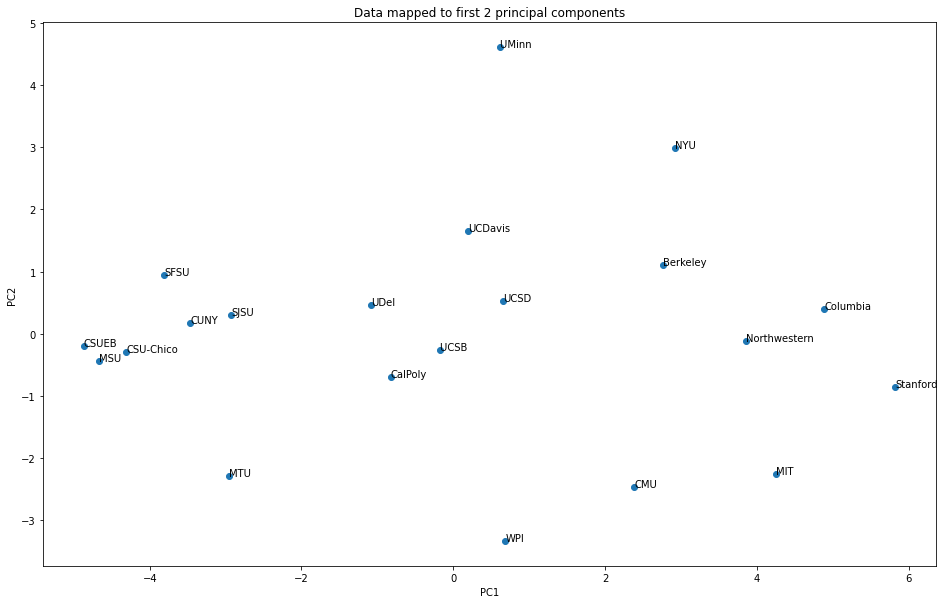

In [27]:
# Plot the data in the space defined by the first two principal components
scaler = StandardScaler()
collegedataScaled=scaler.fit_transform(college_data.iloc[:,3:21])
pca = PCA()
X = pca.fit_transform(collegedataScaled)
plt.figure(figsize=(16, 10))
plt.scatter(X[:,0], X[:,1], )
plt.title('Data mapped to first 2 principal components')
plt.xlabel('PC1')
plt.ylabel('PC2');

# Label each point with the name of the school.
for i in range(21):
    plt.annotate(college_data.iloc[i,2], (X[i,0], X[i,1]))

(c)Plot the amount of variance explained. How many principal components should be used for any further analysis to be done on the data?

Text(0, 0.5, 'Proportion of Variance Explained')

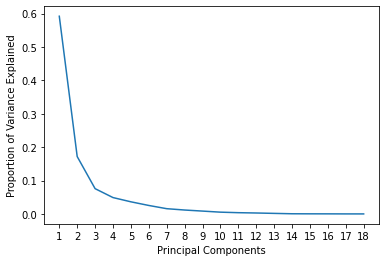

In [28]:
# plt.figure(figsize=(16, 10))
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 ,15, 16, 17, 18])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 ,15, 16, 17, 18], pca.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Proportion of Variance Explained")

It appears that ~7 or so will provide pretty good results for further analysis. Further amounts appear to provide diminishing returns.

# 5. Stock Data

(a) Perform principal components analysis on the stock data (make sure to prepare the data in any way necessary).

In [29]:
stocks2020 = pd.read_csv("stock_data_2020.csv")
snames = stocks2020.columns[1:31]
pca = PCA()
pca.fit(stocks2020.iloc[:,1:31])
pc = pd.DataFrame(pca.components_)
pc.columns = snames
pc.index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30']
pc

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,PFE,RTX,XOM
PC1,-0.081667,-0.188198,-0.731751,-0.171934,-0.024492,-0.115333,-0.196808,-0.081057,-0.306077,-0.141186,-0.104523,-0.016702,-0.040607,-0.188241,-0.052551,-0.164373,-0.119052,-0.035776,-0.060557,-0.116006,-0.058002,-0.166962,-0.174201,-0.144136,-0.019713,-0.032449,-0.014596,-0.018460,-0.138060,-0.077499
PC2,-0.317904,0.018552,0.425004,-0.245184,0.013035,0.097470,-0.113367,-0.063959,-0.081335,-0.418346,0.046749,0.064633,-0.043814,0.053867,0.008941,-0.164964,-0.089132,0.000222,-0.338941,-0.233050,-0.137932,-0.028672,-0.371352,-0.138234,-0.016328,0.072359,-0.174681,-0.016060,0.105832,0.098285
PC3,0.075550,0.059326,-0.064562,0.431697,-0.083859,-0.215654,0.265434,0.053003,0.037599,-0.533617,-0.240259,-0.166917,-0.129225,0.142961,0.019415,-0.107330,0.065872,-0.041833,-0.230406,0.282327,0.056118,0.128147,-0.008263,-0.208777,0.012661,0.009166,0.191491,0.007781,0.000323,-0.116506
PC4,0.156389,0.004060,0.263312,0.094141,-0.139608,-0.350425,-0.193075,0.019194,-0.372353,0.252379,-0.055887,-0.130915,-0.178895,-0.060616,0.044562,0.400722,-0.084252,-0.013550,-0.033422,0.089406,0.189887,-0.032129,-0.448214,-0.059609,-0.001324,-0.065118,-0.004542,-0.064273,-0.040653,-0.169034
PC5,0.350550,-0.055272,0.113980,-0.058345,0.082468,-0.102108,0.278640,-0.013964,0.227422,0.014220,-0.109216,-0.063935,-0.118741,-0.066252,-0.086544,-0.441315,-0.165270,-0.119621,0.417710,-0.082254,-0.123874,0.010239,-0.422110,0.109882,-0.069599,-0.039062,-0.109387,-0.057887,-0.148445,-0.040404
PC6,-0.069634,-0.085303,0.287159,-0.019992,-0.039533,-0.108063,-0.327616,-0.093715,-0.233118,0.003875,-0.219380,-0.090328,-0.221136,-0.066262,-0.018685,-0.274715,-0.240875,-0.160470,0.199886,-0.064788,-0.056489,0.258801,0.536141,-0.128738,-0.064808,0.021348,0.012460,-0.053787,-0.062395,-0.148980
PC7,0.051717,0.067003,0.055664,-0.162769,-0.040433,-0.172875,0.077114,-0.122426,-0.061753,-0.369255,0.344750,0.140586,0.343626,0.054424,0.124261,0.131261,-0.459508,0.001945,0.306988,0.055199,0.150393,-0.168200,0.077289,0.012113,0.046688,-0.019624,0.266451,0.033746,0.069416,-0.182510
PC8,-0.213960,0.363786,-0.107469,-0.138705,-0.073691,-0.145474,0.171300,-0.033421,0.018629,0.141358,-0.002413,0.134983,-0.225480,0.101191,0.038272,0.022047,-0.264227,-0.252888,-0.229354,0.329647,-0.340678,-0.076094,0.069888,0.352282,-0.081203,-0.114133,-0.171346,-0.077819,0.031441,-0.174790
PC9,0.364094,0.023553,0.045837,-0.366135,-0.098504,0.071348,0.423536,-0.096828,-0.292485,0.079014,-0.128764,-0.380584,0.051029,0.059423,0.067627,-0.054463,-0.077145,0.154624,-0.326253,-0.181338,0.101759,-0.096187,0.222692,0.072548,0.050434,0.075242,-0.045318,0.070202,0.037899,0.003784
PC10,0.029470,0.080928,0.174549,0.176470,0.041217,0.177655,-0.039865,0.112574,-0.483521,-0.167669,-0.107865,0.171394,-0.005990,-0.192281,-0.081366,-0.216635,0.232874,0.115726,0.128633,0.190770,-0.048543,-0.406040,0.023923,0.417104,0.055163,0.014230,0.129374,0.032238,-0.048199,0.065526


(b) Plot the data in the space defined by the first two principal components

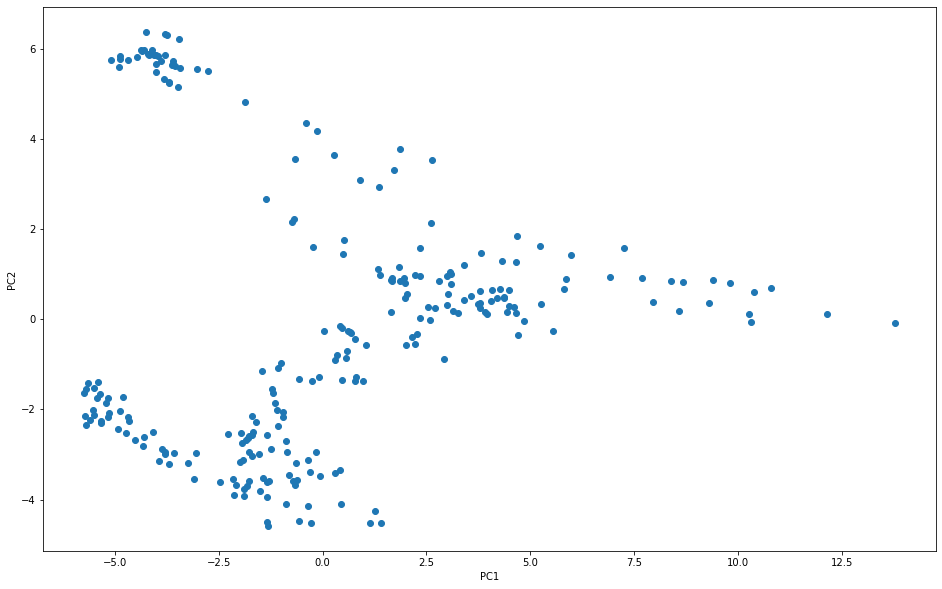

In [30]:
# We will scale the data.
scaler = StandardScaler()
stocks2020Scaled=scaler.fit_transform(stocks2020.iloc[:,1:31])
pca = PCA()
# Plot the data in the space defined by the first two principal components
X = pca.fit_transform(stocks2020Scaled)
plt.figure(figsize=(16, 10))
plt.scatter(X[:,0], X[:,1], )
plt.xlabel('PC1')
plt.ylabel('PC2');

(c) Describe any structures you see in the plot (perhaps in terms of the types of stocks)?

There appears to be a large clump towards the upper left and the lower left of the graph. My guess is that these may correspond to some of the more commonly seen stocks (E.G. clothing, oil companies, etc), while the more popular and successful points (perhaps "Big Tech" or electronics related stocks) likely are located to the right.

(d) Perform PCA on the DOW Jones data from 2019, plot the data as in (b). Comment on the patterns seen for 2019 and differences from 2020

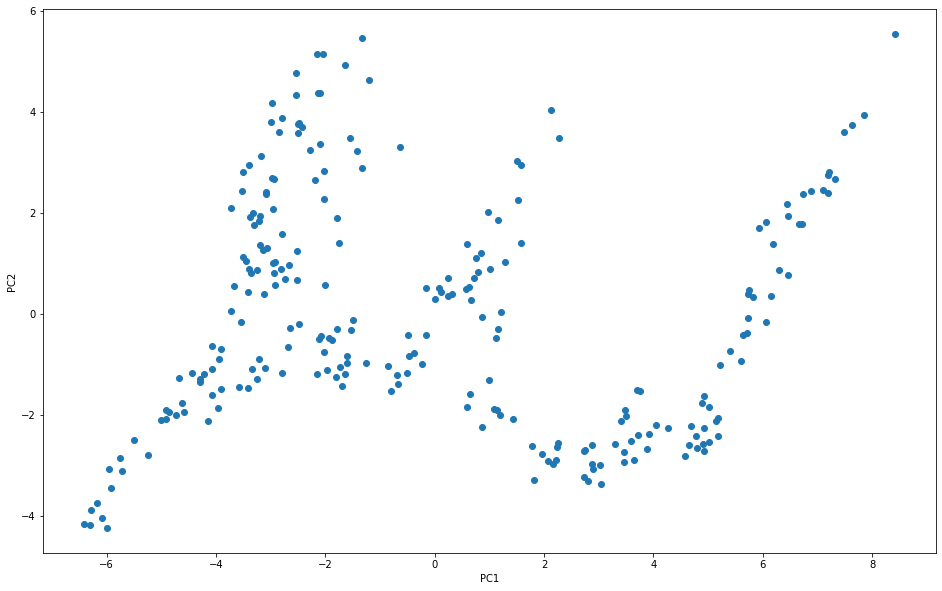

In [31]:
stocks2019 = pd.read_csv("stock_data_2019.csv")
snames19 = stocks2019.columns[1:31]
pca = PCA()
pca.fit(stocks2020.iloc[:,1:31])
pc = pd.DataFrame(pca.components_)
pc.columns = snames
pc.index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30']

# We will scale the data.
scaler = StandardScaler()
stocks2019Scaled=scaler.fit_transform(stocks2019.iloc[:,1:31])
pca = PCA()
# Plot the data in the space defined by the first two principal components
X = pca.fit_transform(stocks2019Scaled)
plt.figure(figsize=(16, 10))
plt.scatter(X[:,0], X[:,1], )
plt.xlabel('PC1')
plt.ylabel('PC2');

(d) Ultimately, it seems like the structure of this scatter plot is quite different than from the 2020 one. We see there are multiple "hills" as opposed to 2020, where we saw a convergence of points towards the middle.

Question 6

a) Load the addresses. You will need to create a vector listing the party affiliation of each president to match their speech, you may use the file party.txt to help with this classification.

In [32]:
# Load the addresses
listfiles = [f for f in listdir("files/") if isfile(join("files/", f))]
listfiles.sort()

corpus = []

# All parties
party = []

party_affil = []
# Only democrats and republicans
dem_rep = []

filepath_list = []

with open('party.txt') as fi:
  for line in fi:
    if line[0] == 'd' or line[0] == 'r':
      dem_rep.append(line)
    if(line[0] != '\n'):
      party.append(line)
      party_affil.append(line[0])
for i in range(1, 232):
  file_path = "files/a%d.txt" % i
  filepath_list.append(file_path)
  with open(file_path) as f:
    corpus.append(f.read().lower().splitlines())
    f.close()
for i in range (0, 231):
  corpus[i] = ' '.join(corpus[i])
# corpus = list(chain.from_iterable(corpus))

df = pd.DataFrame(list(zip(party_affil, corpus)),
               columns =['Political Party', 'Speech'])
df.head()

,Political Party,Speech
0,n,i embrace with great satisfaction the opportun...
1,n,fellowcitizens of the senate and house of repr...
2,n,fellowcitizens of the senate and house of repr...
3,n,fellowcitizens of the senate and house of repr...
4,n,fellowcitizens of the senate and house of repr...


b) Remove stopwords from consideration for the method. The stopwords are available at stopwords.txt.

In [33]:
TokenPattern = r'\b[a-zA-Z]{1,}\b'
with open("stopwords.txt") as f:
    stopwds = f.read().lower().splitlines()
    f.close()
vectorizer = CountVectorizer(input ='content', token_pattern=TokenPattern,stop_words = stopwds)
X = vectorizer.fit_transform(corpus)

Xframe = pd.DataFrame(X.toarray(), index=filepath_list, columns = vectorizer.get_feature_names())
Xframe.head()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'daren', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mayn', 'mightn', 'mon', 'mustn', 'needn', 'oughtn', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,aaa,aana,aaron,abandon,abandoned,abandonedan,abandoning,abandonment,abandons,abate,abated,abatement,abating,abbas,abbreviation,abdicate,abdicated,abdicating,abdication,abducted,abduction,aberdeen,abess,abet,abetted,abetting,abettors,abeyance,abhor,abhorrence,abhorrent,abhors,abide,abides,abideth,abiding,abilities,ability,abject,abjured,...,youonly,youparticularly,youre,yourshave,yoursis,youth,youthful,youthour,youths,youve,yugoslavia,yukon,zablockiand,zaca,zanesville,zanjon,zarfos,zarfostheyre,zarqawi,zeal,zealand,zealandhas,zealous,zealously,zelaya,zelayas,zeppelin,zeros,zest,zigzag,zimbabwe,zimbabwean,zinc,zion,zollverein,zone,zones,zoological,zooming,zuloaga
files/a1.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
files/a2.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
files/a3.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
files/a4.txt,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
files/a5.txt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


i. Create a term-document matrix, TD for this set of speeches. Restrict this
matrix to the 3000 most frequently used words over all the speeches (not including the stopwords already removed). Show the first 10 rows and 5 columns.

In [34]:
# Only have the 3000 most common words.
count = Xframe.sum()
fwords = count.sort_values(ascending=True)
temp = fwords[0:27267]
tempy = fwords[24267:27267]

index = fwords.index
a_list = list(index)

# Drop these columns from the dataframe.
new = Xframe.drop(columns=a_list[0:24267])

# We do not want to consider any non-democrats or non-republicans in training.
# Delete this data from the dataframe.
for i in range(0,231):
  index = i + 1
  if party_affil[i] != 'r' and party_affil[i] != 'd':
    file_path = "files/a%d.txt" % (index)
    new = new.drop(file_path)
    # get rid of this data here too because it's irrelevant
    df = df.drop(i)
new.iloc[0:10, 0:5]

,abandon,abandoned,ability,abolished,abolition
files/a41.txt,1,1,1,1,0
files/a42.txt,0,1,3,0,0
files/a43.txt,0,3,1,1,0
files/a44.txt,2,0,0,0,1
files/a45.txt,0,0,0,1,0
files/a46.txt,2,0,2,0,0
files/a47.txt,1,0,1,1,0
files/a48.txt,0,0,1,0,0
files/a49.txt,0,2,1,0,0
files/a50.txt,0,2,0,0,0


ii. For the 5 speeches listed above determine the party affiliations of the
president. Calculate and report P(C = Dems | X) and P(C = Reb | X) under the
Bernoulli model of Na¨ıve Bayes.

In [35]:
Speeches = [175, 209, 220, 228, 231]

# our X value for the Naive Bayes
X = new
for i in Speeches:
  file_path = "files/a%d.txt" % (i)
  X = X.drop(file_path)

# our y value for the Naive Bayes
y = df
for i in Speeches:
  y = y.drop(i-1)
y = y.drop(columns='Speech')
y.head()

clf = nb.BernoulliNB()
clf.fit(X, y)


df1 = new.filter(like='999', axis=0)
df1 = df1.append(new.filter(like='175',  axis=0))
df1 = df1.append(new.filter(like='209',  axis=0))
df1 = df1.append(new.filter(like='220',  axis=0))
df1 = df1.append(new.filter(like='228',  axis=0))
df1 = df1.append(new.filter(like='231',  axis=0))

clf.predict(df1)


# Based on the BernoulliNB method, we can predict that the Presidents will 
# belong to the Democratic party through the outcomes that were produced above.
# Our model predicted all Presidents to be democrats. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['d', 'd', 'd', 'd', 'd'], dtype='<U1')

iii. For the 5 speeches listed above determine the party affiliations of the
president. Calculate and report P(C = Dems | X) and P(C = Reb | X) under the
Multinomial model of Na¨ıve Bayes.

In [36]:
# our X value for the Naive Bayes
X = new
for i in Speeches:
  file_path = "files/a%d.txt" % (i)
  X = X.drop(file_path)

# our y value for the Naive Bayes
y = df
for i in Speeches:
  y = y.drop(i-1)
y = y.drop(columns='Speech')
y.head()

clf = nb.MultinomialNB()
clf.fit(X, y)


df1 = new.filter(like='999', axis=0)
df1 = df1.append(new.filter(like='175',  axis=0))
df1 = df1.append(new.filter(like='209',  axis=0))
df1 = df1.append(new.filter(like='220',  axis=0))
df1 = df1.append(new.filter(like='228',  axis=0))
df1 = df1.append(new.filter(like='231',  axis=0))

clf.predict(df1)


# Based on the MultinomialNB method, we can predict that the Presidents will 
# belong to the Democratic party through the outcomes that were produced above.
# Our model predicted all Presidents to be democrats. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['d', 'd', 'd', 'd', 'd'], dtype='<U1')